In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('lbp.csv')
df_dates=pd.to_datetime(df['Date'])
cols = list(df)[1:10]
df1 = df[cols].astype(float)
# df1

In [3]:
df2=np.array(df1)
data = df2.reshape(28,4,9)
# data

In [4]:
train_data1, test_data1 = train_test_split(data, test_size=0.53, shuffle=False)
# train_data1.shape,test_data1.shape

In [5]:
train_data=train_data1[:,:,3:4]
train_data_o=train_data1[:,-1,-1].reshape(-1,1)
test_data=test_data1[:,:,3:4]
test_data_o=test_data1[:,-1,-1].reshape(-1,1)
train_data.shape,train_data_o.shape,test_data.shape,test_data_o.shape


((13, 4, 1), (13, 1), (15, 4, 1), (15, 1))

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data.reshape(-1, 1)).reshape(train_data.shape)
test_data = scaler.fit_transform(test_data.reshape(-1, 1)).reshape(test_data.shape)
train_data_o = scaler.fit_transform(train_data_o)
test_data_o = scaler.fit_transform(test_data_o)
train_data.shape,test_data.shape,train_data_o.shape,test_data_o.shape

((13, 4, 1), (15, 4, 1), (13, 1), (15, 1))

In [7]:
train_X = train_data[:, :,:]
train_y = train_data_o
test_X = test_data[:, :, :]
test_y = test_data_o

In [8]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# model.summary()


In [9]:
model.fit(train_X, train_y, epochs=25, batch_size=32, validation_data=(test_X, test_y), verbose=2)
# Make predictions on the test data
predictions = model.predict(test_X)
# predictions

Epoch 1/25
1/1 - 11s - loss: 0.5290 - val_loss: 0.4653 - 11s/epoch - 11s/step
Epoch 2/25
1/1 - 0s - loss: 0.5116 - val_loss: 0.4493 - 50ms/epoch - 50ms/step
Epoch 3/25
1/1 - 0s - loss: 0.4943 - val_loss: 0.4331 - 53ms/epoch - 53ms/step
Epoch 4/25
1/1 - 0s - loss: 0.4767 - val_loss: 0.4164 - 50ms/epoch - 50ms/step
Epoch 5/25
1/1 - 0s - loss: 0.4584 - val_loss: 0.3990 - 46ms/epoch - 46ms/step
Epoch 6/25
1/1 - 0s - loss: 0.4393 - val_loss: 0.3809 - 58ms/epoch - 58ms/step
Epoch 7/25
1/1 - 0s - loss: 0.4192 - val_loss: 0.3620 - 47ms/epoch - 47ms/step
Epoch 8/25
1/1 - 0s - loss: 0.3981 - val_loss: 0.3422 - 56ms/epoch - 56ms/step
Epoch 9/25
1/1 - 0s - loss: 0.3758 - val_loss: 0.3217 - 51ms/epoch - 51ms/step
Epoch 10/25
1/1 - 0s - loss: 0.3525 - val_loss: 0.3005 - 66ms/epoch - 66ms/step
Epoch 11/25
1/1 - 0s - loss: 0.3281 - val_loss: 0.2790 - 64ms/epoch - 64ms/step
Epoch 12/25
1/1 - 0s - loss: 0.3029 - val_loss: 0.2574 - 49ms/epoch - 49ms/step
Epoch 13/25
1/1 - 0s - loss: 0.2771 - val_loss: 0.

In [10]:
test_y_rescale=scaler.inverse_transform(test_y)
predictions_rescale=scaler.inverse_transform(predictions)
predictions_rescale,test_y_rescale

(array([[40.13497 ],
        [40.135303],
        [40.13804 ],
        [40.13971 ],
        [40.1353  ],
        [40.14459 ],
        [40.1362  ],
        [40.13573 ],
        [40.144844],
        [40.137093],
        [40.15197 ],
        [40.153908],
        [40.16093 ],
        [40.136898],
        [40.134914]], dtype=float32),
 array([[40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9],
        [40.1],
        [40.2],
        [39.9]]))

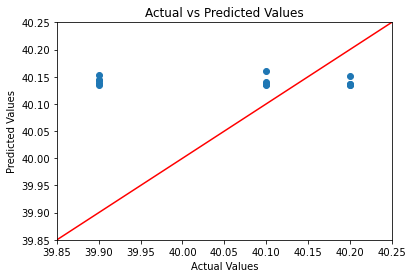

MSE:  0.021605213606963238
RMSE:  0.1469871205479012


In [11]:
x_range=[39.85,40.25]
y_range=[39.85,40.25]
plt.xlim(x_range)
plt.ylim(y_range)
plt.plot(x_range, y_range, color='red')
plt.scatter(test_y_rescale,predictions_rescale)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
mse = mean_squared_error(test_y_rescale,predictions_rescale)
rmse = np.sqrt(mse)
print("MSE: ",  mse)
print("RMSE: ", rmse)